# Deep Learning Techniques for Image Classification

## Workflow: 
 

*   Import data
*   Data exploration
* Data visulization
* VGG19 (without augmentation)
* VGG19 (with augmentation)
* Inception (without augmentation)
* Inception (with augmentation)




## Import data and libraries

In [1]:
# Importations:
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Specifying constant values
IMAGE_SIZE= 256
BATCH_SIZE= 32

In [3]:
# The dataset: 
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    'drive/My Drive/brain_tumor',
    shuffle= True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 253 files belonging to 2 classes.


In [4]:
# Importing the dataset using ImageDataGenerator
directory= 'drive/My Drive/brain_tumor/'

batch_size=32
datagen_args = dict(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
                   rescale=1./255)
datagen = ImageDataGenerator(**datagen_args)
datagenerator = datagen.flow_from_directory('drive/My Drive/brain_tumor/',target_size=(128,128),
                                            batch_size=batch_size,interpolation="lanczos",shuffle=True)

print(datagenerator.class_indices)

Found 253 images belonging to 2 classes.
{'no': 0, 'yes': 1}


In [5]:
# Splitting the dataset into training and validation datasets
def image_generator(height,width):
    datagen = ImageDataGenerator(
            rescale=1./255.,
            validation_split=0.2,
            )
    train_dataset = datagen.flow_from_directory(
            directory,
            batch_size=batch_size,
            subset="training",
            shuffle=True,
            class_mode='binary',
            target_size=(height, width),
            classes={'no': 0., 'yes': 1.}
            )
    val_dataset = datagen.flow_from_directory(
              directory,
              subset="validation",
              class_mode='binary',
              target_size=(height, width),
                            batch_size=batch_size,
            classes={'no': 0., 'yes': 1.}
            )
    
    return train_dataset, val_dataset

train_dataset, val_dataset = image_generator(244,244)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


## Data Expolration

In [6]:
# Splitting the dataset into their categories 
no_tumor = os.listdir(directory + '/no/')
yes_tumor = os.listdir(directory + '/yes/')
yes_tumor

['Y11.jpg',
 'Y120.JPG',
 'Y116.JPG',
 'Y103.jpg',
 'Y107.jpg',
 'Y112.JPG',
 'Y111.JPG',
 'Y101.jpg',
 'Y104.jpg',
 'Y1.jpg',
 'Y114.JPG',
 'Y100.JPG',
 'Y115.JPG',
 'Y108.jpg',
 'Y105.jpg',
 'Y12.jpg',
 'Y10.jpg',
 'Y117.JPG',
 'Y106.jpg',
 'Y102.jpg',
 'Y109.JPG',
 'Y113.JPG',
 'Y168.jpg',
 'Y17.jpg',
 'Y181.jpg',
 'Y15.jpg',
 'Y165.JPG',
 'Y180.jpg',
 'Y163.JPG',
 'Y13.jpg',
 'Y186.jpg',
 'Y147.JPG',
 'Y183.jpg',
 'Y154.jpg',
 'Y155.JPG',
 'Y167.JPG',
 'Y185.jpg',
 'Y158.JPG',
 'Y19.JPG',
 'Y159.JPG',
 'Y182.JPG',
 'Y153.jpg',
 'Y187.jpg',
 'Y160.JPG',
 'Y169.jpg',
 'Y157.JPG',
 'Y162.jpg',
 'Y164.JPG',
 'Y170.JPG',
 'Y18.JPG',
 'Y148.JPG',
 'Y188.jpg',
 'Y161.JPG',
 'Y146.JPG',
 'Y16.JPG',
 'Y14.jpg',
 'Y184.JPG',
 'Y166.JPG',
 'Y156.JPG',
 'Y243.JPG',
 'Y249.JPG',
 'Y31.jpg',
 'Y258.JPG',
 'Y192.JPG',
 'Y195.JPG',
 'Y242.JPG',
 'Y23.JPG',
 'Y259.JPG',
 'Y256.JPG',
 'Y244.JPG',
 'Y26.jpg',
 'Y24.jpg',
 'Y255.JPG',
 'Y248.JPG',
 'Y29.jpg',
 'Y250.jpg',
 'Y251.JPG',
 'Y22.jpg',
 'Y2

In [7]:
# Number of images in the "tumor" category
tumor_n= len(yes_tumor)
tumor_n

155

In [8]:
# Number of images in the "no_tumor" category
noTumor_n= len(no_tumor)
noTumor_n

98

## Data Visulization

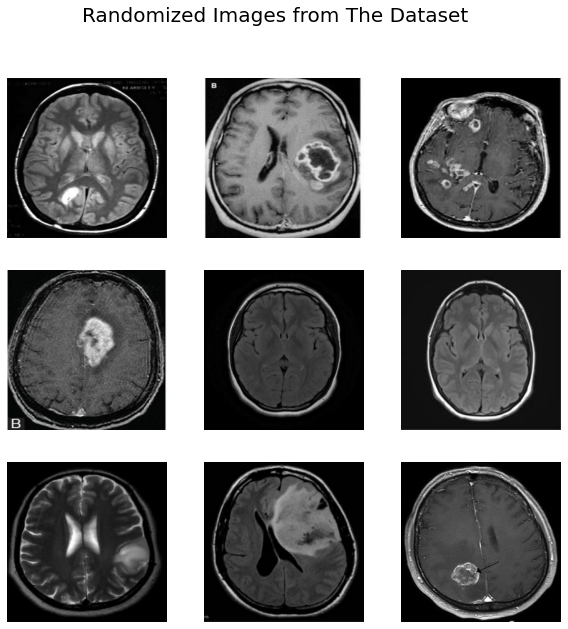

In [9]:
# Random images from the dataset

plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(9):
    ax= plt.subplot(3,3, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.suptitle("Randomized Images from The Dataset",fontsize=20)
    plt.axis("off")

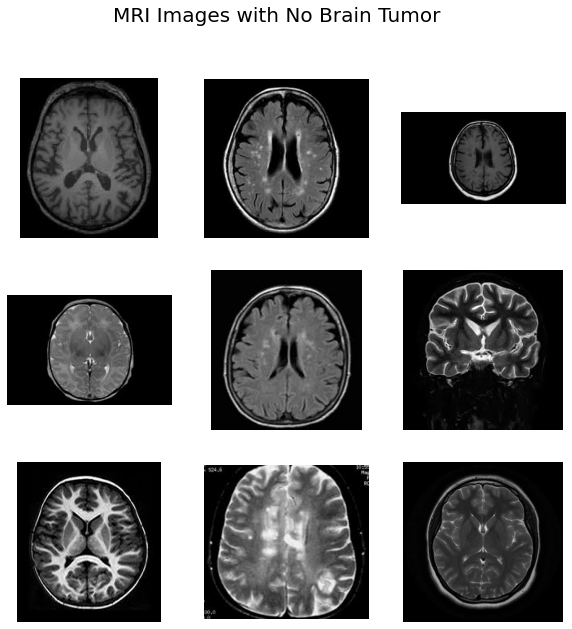

In [10]:
# Images from the "no_tumor" category

fig = plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('drive/My Drive/brain_tumor/no/'+ no_tumor[i])
    plt.imshow(img)
    plt.axis("off")
plt.suptitle("MRI Images with No Brain Tumor",fontsize=20)
plt.show()

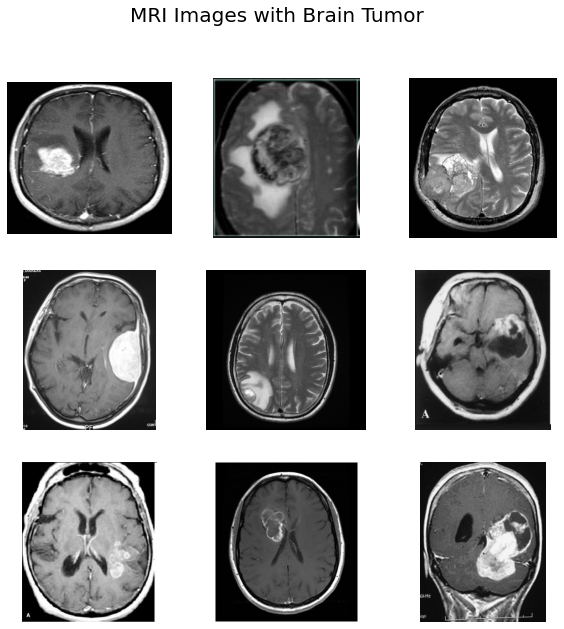

In [11]:
# Images from the tumor category 
fig = plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('drive/My Drive/brain_tumor/yes/'+ yes_tumor[i])
    plt.imshow(img)
    plt.axis("off")
plt.suptitle("MRI Images with Brain Tumor",fontsize=20)
plt.show()

In [12]:
Classes = {'no':0, 'yes':1}

In [13]:
# Append the images and their respective classes into arrays to be plotted 
X = []
y = []
for i in Classes:
    path = 'drive/My Drive/brain_tumor/'+i
    for j in os.listdir(path):
        X.append(img)
        y.append(Classes[i])
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((253, 890, 700, 3), (253,))

<BarContainer object of 2 artists>

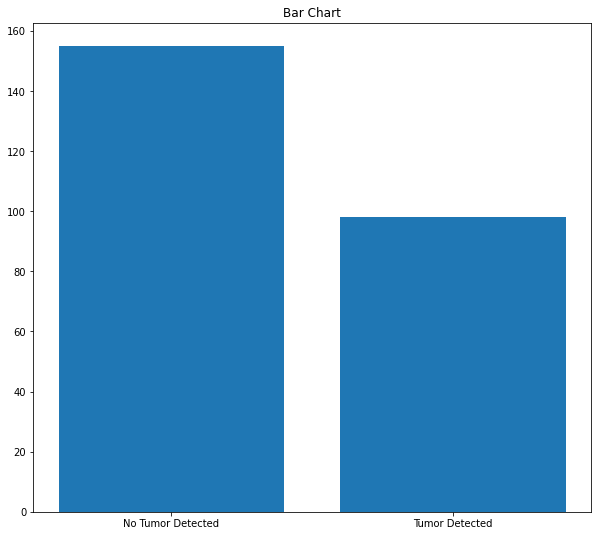

In [14]:
# Checking for imbalanced data using a bar chart

plt.figure(figsize=(10,9))
plt.title("Bar Chart")
Class_series=pd.Series(y)
lis=["No Tumor Detected","Tumor Detected"]
Tumor_or_not = Class_series.value_counts().tolist()
values = [Tumor_or_not[0], Tumor_or_not[1]]

plt.bar(lis,Class_series.value_counts())

([<matplotlib.patches.Wedge at 0x7f026c0ce2d0>,
 [Text(-0.3812093668742744, 1.0318330381448904, 'No Tumor Detected'),
  Text(0.381209463481454, -1.0318330024534892, 'Tumor Detected')],
 [Text(-0.20793238193142238, 0.5628180208063038, '61.3%'),
  Text(0.2079324346262476, -0.5628180013382668, '38.7%')])

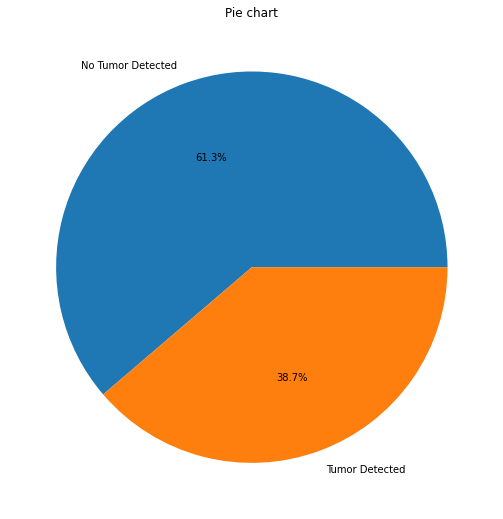

In [15]:
# Checking for imbalanced data using a pie chart
plt.figure(figsize=(10,9))
plt.title("Pie chart")
lis=["No Tumor Detected","Tumor Detected"]
Tumor_or_not = Class_series.value_counts().tolist()
values = [Tumor_or_not[0], Tumor_or_not[1]]

plt.pie(Class_series.value_counts(), labels=lis, autopct='%1.1f%%')

## VGG19 Implementation

### VGG19 (without data augmentation)

In [16]:
# specifying constants 
height= 244
width= 244
input_shape = (height, width, 3)

In [17]:
# In this step, we're utilizing the keras' pre-trained model "vgg19.VGG19" using imagenet as a benchmark
# After we call it, we'll pass it through a sequnetial model with a sigmoid function as an activation function
# The optimizer of choice is adam with LR of 0.01

base_model = tf.keras.applications.vgg19.VGG19(
    weights='imagenet', 
    include_top=False,
    input_shape=input_shape
)

# "freezing" the base model
base_model.trainable = False

model_vgg19 = tf.keras.Sequential()
model_vgg19.add(base_model)
model_vgg19.add(tf.keras.layers.Flatten())

model_vgg19.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_vgg19.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=['acc'])
model_vgg19.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
_________________________________________________________________


In [18]:
# Fitting the training and validation datasets into the model and fine-tuning it with reduced learing rate

checkpoint = tf.keras.callbacks.ModelCheckpoint('model/vgg19_best.h5', monitor='acc', verbose=1, mode='max')
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='acc', factor=0.3,
                              patience=3, min_lr=0.0000001)
callbacks_list = [checkpoint,early,reduce_lr]


history = model_vgg19.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=25, 
        shuffle=True, 
        verbose=True,
        callbacks=callbacks_list)

Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 9.2038 - acc: 0.5025
Epoch 1: saving model to model/vgg19_best.h5
7/7 [==============================] - 15s 987ms/step - loss: 9.2038 - acc: 0.5025 - val_loss: 4.1603 - val_acc: 0.4800 - lr: 0.0100
Epoch 2/25
7/7 [==============================] - ETA: 0s - loss: 4.5549 - acc: 0.6404
Epoch 2: saving model to model/vgg19_best.h5
7/7 [==============================] - 2s 338ms/step - loss: 4.5549 - acc: 0.6404 - val_loss: 2.7965 - val_acc: 0.7600 - lr: 0.0100
Epoch 3/25
7/7 [==============================] - ETA: 0s - loss: 3.2065 - acc: 0.6847
Epoch 3: saving model to model/vgg19_best.h5
7/7 [==============================] - 2s 321ms/step - loss: 3.2065 - acc: 0.6847 - val_loss: 3.8214 - val_acc: 0.7600 - lr: 0.0100
Epoch 4/25
7/7 [==============================] - ETA: 0s - loss: 3.4353 - acc: 0.8030
Epoch 4: saving model to model/vgg19_best.h5
7/7 [==============================] - 2s 319ms/step - loss: 3.4353 - acc: 

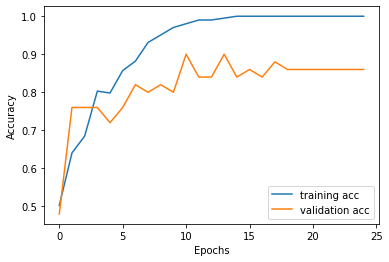

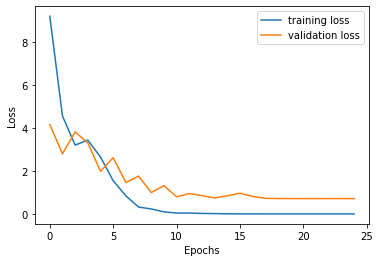

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='training acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [20]:
# Evaluating the VGG19 model

val_result = model_vgg19.evaluate(val_dataset)

2/2 [==============================] - 1s 173ms/step - loss: 0.7146 - acc: 0.8600


### VGG19 with data augmentation

In [21]:
# Data augmentation function
# Specifies the parameters such the rotation, width shift, the horizontal shift and more
# And creates an augmented dataset utlizing the data augmention 

def augmentataion_generator(height,width):
    datagen = ImageDataGenerator(
            rescale=1./255.,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            rotation_range=30,
            horizontal_flip=True,
            brightness_range=(0.5, 1.0)
            )
    aug_train_ds = datagen.flow_from_directory(
            directory,
            batch_size=64,
            shuffle=True,
            class_mode='binary',
            target_size=(height, width),
            classes={'no': 0., 'yes': 1.}
            )
    return aug_train_ds
aug_train_ds = augmentataion_generator(height,width)

Found 253 images belonging to 2 classes.


In [22]:
# The same VGG19 model is employed again but with the augmented dataset

checkpoint = tf.keras.callbacks.ModelCheckpoint('model/vgg19_best.h5', monitor='acc', verbose=1, mode='max')
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='acc', factor=0.3,
                              patience=3, min_lr=0.0000001)
callbacks_list = [checkpoint,early,reduce_lr]

history = model_vgg19.fit(
        aug_train_ds,
        validation_data=val_dataset,
        epochs=25, 
        shuffle=True, 
        verbose=True,
        callbacks=callbacks_list)
  

Epoch 1/25
4/4 [==============================] - ETA: 0s - loss: 0.6393 - acc: 0.8617
Epoch 1: saving model to model/vgg19_best.h5
4/4 [==============================] - 19s 3s/step - loss: 0.6393 - acc: 0.8617 - val_loss: 0.7088 - val_acc: 0.8600 - lr: 2.7000e-04
Epoch 2/25
4/4 [==============================] - ETA: 0s - loss: 0.4923 - acc: 0.8577
Epoch 2: saving model to model/vgg19_best.h5
4/4 [==============================] - 6s 2s/step - loss: 0.4923 - acc: 0.8577 - val_loss: 0.7029 - val_acc: 0.8600 - lr: 2.7000e-04
Epoch 3/25
4/4 [==============================] - ETA: 0s - loss: 0.5390 - acc: 0.8498
Epoch 3: saving model to model/vgg19_best.h5
4/4 [==============================] - 7s 2s/step - loss: 0.5390 - acc: 0.8498 - val_loss: 0.6939 - val_acc: 0.8600 - lr: 2.7000e-04
Epoch 4/25
4/4 [==============================] - ETA: 0s - loss: 0.4411 - acc: 0.8419
Epoch 4: saving model to model/vgg19_best.h5
4/4 [==============================] - 6s 1s/step - loss: 0.4411 - acc: 

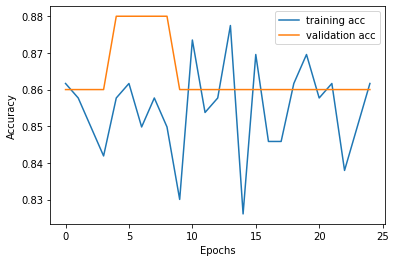

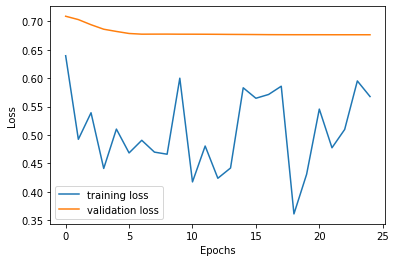

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='training acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [24]:
model_vgg19.evaluate(val_dataset)

2/2 [==============================] - 1s 174ms/step - loss: 0.6762 - acc: 0.8600


[0.676228940486908, 0.8600000143051147]

## Inception V3

### Inception V3 without data augmentation

In [25]:
# Keras’ pre-trained InceptionV3 model was used as the base model with the “ImageNet” as the weights
# A sequential Keras’ model is built, and the base model was passed to it and a flatten layer was added as well to flatten the input into a single dimension.
# Sigmoid function was used in the dense layer as an activation function.  


in_train, in_val = image_generator(height,width)

tf.keras.backend.clear_session()
input_shape = (height, width, 3)
in_model = tf.keras.applications.InceptionV3(
    weights='imagenet', 
    include_top=False, 
    input_shape=input_shape
)
model_inceptionv3 = tf.keras.Sequential()
model_inceptionv3.add(in_model)
model_inceptionv3.add(tf.keras.layers.Flatten())
model_inceptionv3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_inceptionv3.compile(
                    loss='binary_crossentropy', 
                    optimizer=tf.keras.optimizers.Adam(0.001),
                    metrics=['acc']
)
model_inceptionv3.summary()


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 1)                 73729     
                                                                 
Total params: 21,876,513
Trainable params: 21,842,081
Non-trainable params: 34,432
_________________________________________________________________


In [26]:
# Fitting the data into the model
history = model_inceptionv3.fit(
        in_train,
        validation_data=in_val,
        epochs=25, 
        verbose=True)

Epoch 1/25
7/7 [==============================] - 17s 1s/step - loss: 1.9979 - acc: 0.5961 - val_loss: 676.6957 - val_acc: 0.3800
Epoch 2/25
7/7 [==============================] - 2s 354ms/step - loss: 0.8789 - acc: 0.8227 - val_loss: 211.8145 - val_acc: 0.3800
Epoch 3/25
7/7 [==============================] - 2s 329ms/step - loss: 0.2672 - acc: 0.8768 - val_loss: 10.5567 - val_acc: 0.6800
Epoch 4/25
7/7 [==============================] - 2s 325ms/step - loss: 0.1316 - acc: 0.9310 - val_loss: 23.0766 - val_acc: 0.6200
Epoch 5/25
7/7 [==============================] - 2s 322ms/step - loss: 0.2229 - acc: 0.9310 - val_loss: 198.0412 - val_acc: 0.6200
Epoch 6/25
7/7 [==============================] - 2s 362ms/step - loss: 0.3299 - acc: 0.9163 - val_loss: 74991.3047 - val_acc: 0.6200
Epoch 7/25
7/7 [==============================] - 2s 332ms/step - loss: 0.1658 - acc: 0.9360 - val_loss: 2173.8762 - val_acc: 0.6200
Epoch 8/25
7/7 [==============================] - 2s 365ms/step - loss: 0.241

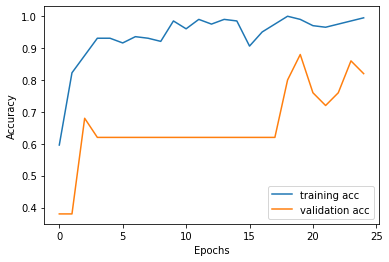

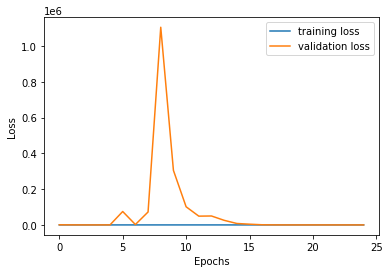

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='training acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [28]:
model_inceptionv3.evaluate(val_dataset)

2/2 [==============================] - 0s 84ms/step - loss: 1.5566 - acc: 0.8200


[1.5566047430038452, 0.8199999928474426]

In [29]:
# Creating data augmention wit the same function used for the VGG19 model 
# and passing it to the same Inception V3 model

aug_in_train = augmentataion_generator(height,width)

early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='acc', factor=0.3,
                              patience=3, min_lr=0.0000001)
callbacks_list = [checkpoint,early,reduce_lr]

history = model_inceptionv3.fit(
        aug_in_train,
        validation_data=in_val,
        epochs=25, 
        verbose=True,
        callbacks=callbacks_list)

Found 253 images belonging to 2 classes.
Epoch 1/25
4/4 [==============================] - ETA: 0s - loss: 0.2410 - acc: 0.9130
Epoch 1: saving model to model/vgg19_best.h5
4/4 [==============================] - 17s 3s/step - loss: 0.2410 - acc: 0.9130 - val_loss: 1.0606 - val_acc: 0.8400 - lr: 0.0010
Epoch 2/25
4/4 [==============================] - ETA: 0s - loss: 0.2760 - acc: 0.8854
Epoch 2: saving model to model/vgg19_best.h5
4/4 [==============================] - 8s 2s/step - loss: 0.2760 - acc: 0.8854 - val_loss: 0.1539 - val_acc: 0.9200 - lr: 0.0010
Epoch 3/25
4/4 [==============================] - ETA: 0s - loss: 0.2026 - acc: 0.9289
Epoch 3: saving model to model/vgg19_best.h5
4/4 [==============================] - 11s 3s/step - loss: 0.2026 - acc: 0.9289 - val_loss: 0.1168 - val_acc: 0.9400 - lr: 0.0010
Epoch 4/25
4/4 [==============================] - ETA: 0s - loss: 0.1379 - acc: 0.9565
Epoch 4: saving model to model/vgg19_best.h5
4/4 [==============================] - 7s 

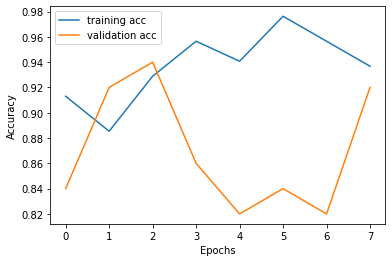

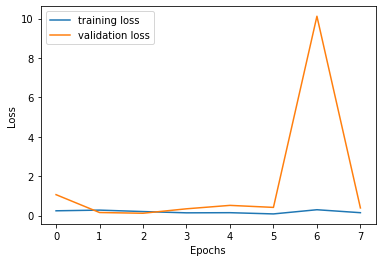

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='training acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [31]:
model_inceptionv3.evaluate(val_dataset)

2/2 [==============================] - 0s 72ms/step - loss: 0.1168 - acc: 0.9400


[0.11676590144634247, 0.9399999976158142]